Building Model

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt

2023-12-10 16:22:01.252329: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
#upload dataset
csv_path = "/Users/vivianwang/Desktop/data2.csv"
df = pd.read_csv(csv_path)


In [9]:
import numpy as np
def reverse_sequences(sequences):
   reversed_sequences = [sequence[::-1] for sequence in sequences]
   return reversed_sequences

df2 = df.iloc[:7000]

input_sequences = df2['input'].apply(lambda x: ' '.join(x)).values
output_sequences = df2['output'].apply(lambda x: ' '.join(x)).values

reversed_output_sequences = reverse_sequences(output_sequences)














import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, TimeDistributed




tokenizer = Tokenizer()
tokenizer.fit_on_texts(input_sequences)
tokenizer.fit_on_texts(output_sequences)


input_sequences = tokenizer.texts_to_sequences(input_sequences)
output_sequences = tokenizer.texts_to_sequences(output_sequences)


max_len_input = max(len(seq) for seq in input_sequences)
max_len_output = max(len(seq) for seq in output_sequences)


# padded_input = pad_sequences(input_sequences, maxlen=max_len_input, padding='post')
# padded_output = pad_sequences(output_sequences, maxlen=max_len_output, padding='post')
max_len = max(max_len_input, max_len_output)


padded_input = pad_sequences(input_sequences, maxlen=max_len, padding='post')
padded_output = pad_sequences(output_sequences, maxlen=max_len, padding='post')




# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(padded_input, padded_output, test_size=0.2, random_state=42)


# Build the model
embedding_dim = 100  
vocab_size = len(tokenizer.word_index) + 1


model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len_input))
model.add(LSTM(100, return_sequences=True))  # Return sequences for TimeDistributed layer
model.add(TimeDistributed(Dense(vocab_size, activation='softmax')))
model.add(TimeDistributed(Dense(vocab_size, activation='softmax')))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model
# model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)
 

Epoch 1/10
88/88 [==============================] - 524s 6s/step - loss: 3.3090 - accuracy: 0.7831 - val_loss: 3.0875 - val_accuracy: 0.8806
Epoch 2/10
88/88 [==============================] - 532s 6s/step - loss: 2.8742 - accuracy: 0.8828 - val_loss: 2.6853 - val_accuracy: 0.8806
Epoch 3/10
88/88 [==============================] - 637s 7s/step - loss: 2.5288 - accuracy: 0.8828 - val_loss: 2.3798 - val_accuracy: 0.8806
Epoch 4/10
88/88 [==============================] - 554s 6s/step - loss: 2.2351 - accuracy: 0.8842 - val_loss: 2.0949 - val_accuracy: 0.8895
Epoch 5/10
88/88 [==============================] - 472s 5s/step - loss: 2.4890 - accuracy: 0.6914 - val_loss: 2.5452 - val_accuracy: 0.8806
Epoch 6/10
88/88 [==============================] - 471s 5s/step - loss: 2.3329 - accuracy: 0.8828 - val_loss: 2.1432 - val_accuracy: 0.8806
Epoch 7/10
88/88 [==============================] - 523s 6s/step - loss: 1.9848 - accuracy: 0.8828 - val_loss: 1.8407 - val_accuracy: 0.8806
Epoch 8/10
88

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 3560, 100)         3800      
                                                                 
 lstm_1 (LSTM)               (None, 3560, 100)         80400     
                                                                 
 time_distributed_2 (TimeDi  (None, 3560, 38)          3838      
 stributed)                                                      
                                                                 
 time_distributed_3 (TimeDi  (None, 3560, 38)          1482      
 stributed)                                                      
                                                                 
Total params: 89520 (349.69 KB)
Trainable params: 89520 (349.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_val, y_val)
print(f'Test accuracy: {test_acc}')

44/44 [==============================] - 41s 916ms/step - loss: 1.2562 - accuracy: 0.8806
Test accuracy: 0.8805778622627258


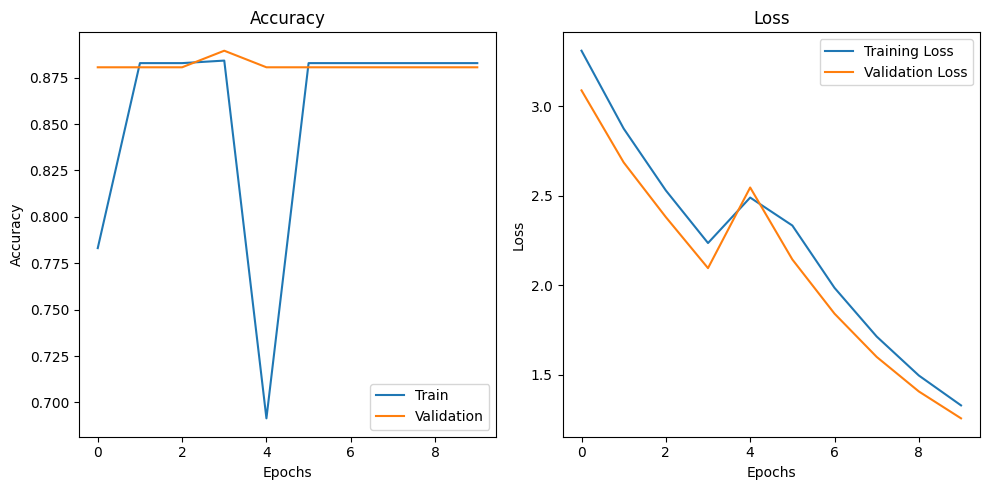

In [12]:
# Extracting training and validation accuracy and loss from the history object
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plotting the accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

# Plotting the loss
plt.subplot(1, 2, 2)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()